# Python et l'analyse de données
## Du jeu vidéo au film : Est-ce qu'un film adapté d'un jeu vidéo marchera forcément ? 

Le monde du jeu vidéo était très connu à l'époque pour ses adaptations de films très peu recommandable. Nous pouvons par exemple prendre la fameuse boîte française 'Infogramme' qui fut fortement moquée par des vidéastes dédiés au jeux vidéos pour ses jeux provenant de film de très mauvaises qualités. 

Toutefois, l'inverse existait aussi ! Les jeux vidéos étant une source abondante d'idée, certains producteurs ont décidés de les développer en film. 

Mais est-ce qu'un jeu vidéo qui a très bien fonctionner va aussi fonctionner dans le monde du cinéma ? 

Ceci est notre problèmatique pour cette analyse de donnée.

#### Importation

Avant de commencer quoi que ce soit, nous allons importer toutes les librairies que nous aurons besoin et les documents sur lesquels nous allosn travailler.

In [5]:
import numpy as np
import pandas as pad
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
video_game_film = pad.read_csv('video_game_films.csv');
video_game = pad.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv');

Pour notre analyse de données, nous allons utiliser deux csv, l'un regroupe les jeux vidéos adaptés en film, tandis que l'autre la vente des jeux vidéos jusqu'en 2016.

In [7]:
video_game_film.head()

,Title,Release date,Worldwide box office,Rotten Tomatoes,Metacritic,Distributor,Original game publisher
0,Super Mario Bros.,1993-05-28,38912465.0,24.0,35.0,Buena Vista Pictures Distribution,Nintendo
1,Double Dragon,1994-11-04,4152699.0,13.0,NaN,Gramercy Pictures,Technōs Japan
2,Street Fighter,1994-12-23,99423521.0,13.0,34.0,Universal Pictures,Capcom
3,Mortal Kombat,1995-08-18,124741822.0,44.0,60.0,New Line Cinema,Midway
4,Mortal Kombat: Annihilation,1997-11-21,51376861.0,2.0,11.0,New Line Cinema,Midway


In [9]:
video_game.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


Observons nos deux tableaux grâce au .head(), nous pourrions utiliser tout simplement video_game, mais il affichera beaucoup trop de données pour le moment.

#### Que remarquons nous ?

Nous nous retrouvons avec deux cvs, mais il nous faut maintenant les regrouper. Cependant, si l'on regarde bien les deux tableaux certains élèments ne coincident pas, ce qui engendera des soucis pour plus tard. Nous devons donc modifier les csv sur deux colonnes :

Name / Title et Worldwide box office.

**Colonne Name/Title** représente le soucis concernant les titres. 

En effet on a deux problèmes : 
- Les titres des jeux vidéos d'une même franchise peut être différente
- La colonne dans les deux csv n'ont pas le même nom

Nous pouvions essayer de résoudre ce problème en le programmant sur python, mais au vue du temps imparti, le changement fu fait à la main.

- Une nouvelle colonne dans les deux fichiers nommée "Surnom" furent créer. Si par exemple le film Lara Croft était affiché dans le csv des films, alors tout les Lara croft dans l'autre fichié étaient maintenant surnomée "Lara Croft" dans la colonne Surnom.

Avec cette technique il n'était plus nécéssaire de modifier le nom de l'autre colonne.

##### Worldwide box office

Worldwide box office et Global_Sales sont des valeurs que nous allons utiliser plus tard car les deux sont des valeurs à peu pret comparable (se trouvant tous les deux en million). Le petit soucis est que l'un affiche toutes la somme tandis que l'autre s'affiche en 0.00. Pour régler ce problème, il fallait juste changer le format de l'un des deux csv (celui avec le moins de valeurs fut choisi pour le changement).

In [14]:
#rslt_df = final[final['Title'] == 'Super Mario Bros.']
#rslt_df.head()

#### Importation 2

In [11]:
video_game_film_m = pad.read_csv('video_game_films_modifie.csv');
video_game_m = pad.read_csv('Video_Games_Sales_modifie.csv');

In [21]:
video_game_film_m

,Title,Release_date,Worldwide_box_office,Worldwide_box_office_tri,Rotten_Tomatoes,Metacritic,Distributor,Original_game_publisher,Surnom
0,Alone in the Dark,2005-01-28,10442808.0,10.440,1.0,9.0,Lionsgate Films,Infogrames,Alone in the Dark
1,Assassin's Creed,2016-12-21,240558621.0,240.550,18.0,36.0,20th Century Fox,Ubisoft,Assassin's Creed
2,BloodRayne,2006-01-06,3650275.0,3.650,4.0,18.0,Boll KG Productions,Majesco Entertainment,BloodRayne
3,Dead Trigger,2019-05-03,151493.0,0.150,NaN,NaN,Saban Films,Madfinger Games,NaN
4,Detective Pikachu,2019-05-10,433005346.0,433.000,68.0,53.0,Warner Bros. Pictures,NintendoThe Pokémon Company,Pokemon
5,DOA: Dead or Alive,2006-09-07,7516532.0,7.510,33.0,38.0,Metro-Goldwyn-Mayer / Dimension Films,Tecmo,Dead or Alive
6,Doom,2005-10-21,55987321.0,55.980,18.0,34.0,Universal Pictures,id Software,Doom
7,Double Dragon,1994-11-04,4152699.0,4.150,13.0,NaN,Gramercy Pictures,Technōs Japan,Double Dragon
8,Far Cry,2008-10-02,743634.0,0.740,NaN,NaN,20th Century Fox,Ubisoft,Far Cry
9,Hitman,2007-11-21,101276318.0,101.270,16.0,35.0,20th Century Fox,Eidos,Hitman


In [13]:
video_game_m.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Surnom
0,1942,NES,1985.0,Shooter,Capcom,0.65,0.14,0.21,0.00,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,¡Shin Chan Flipa en colores!,DS,2007.0,Platform,505 Games,0.00,0.00,0.14,0.00,0.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,.hack: Sekai no Mukou ni + Versus,PS3,2012.0,Action,Namco Bandai Games,0.00,0.00,0.03,0.00,0.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,.hack//G.U. Vol.1//Rebirth,PS2,2006.0,Role-Playing,Namco Bandai Games,0.00,0.00,0.17,0.00,0.17,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,.hack//G.U. Vol.2//Reminisce,PS2,2006.0,Role-Playing,Namco Bandai Games,0.11,0.09,0.00,0.03,0.23,NaN,NaN,NaN,NaN,NaN,NaN,NaN


On se retrouve donc avec deux nouveaux jeux de données que nous allons maintenant fusionner !

In [18]:
#final = pd.concat([video_game_m,video_game_film_m])
melange = pad.merge(video_game_m, video_game_film_m, on='Surnom')

#dropna va permettre de retirer les valeurs NaN tandis que reset_index va remettre l index à zero
melange_f = melange.dropna(subset=['Surnom'])

melange_f = melange_f.reset_index(drop=True)

melange_f

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,...,Rating,Surnom,Title,Release_date,Worldwide_box_office,Worldwide_box_office_tri,Rotten_Tomatoes,Metacritic,Distributor,Original_game_publisher
0,Alone in the Dark,X360,2008.0,Adventure,Atari,0.14,0.30,0.0,0.05,0.48,...,M,Alone in the Dark,Alone in the Dark,2005-01-28,10442808.0,10.44,1.0,9.0,Lionsgate Films,Infogrames
1,Alone in the Dark,Wii,2008.0,Adventure,Atari,0.09,0.08,0.0,0.02,0.18,...,M,Alone in the Dark,Alone in the Dark,2005-01-28,10442808.0,10.44,1.0,9.0,Lionsgate Films,Infogrames
2,Alone in the Dark,PS2,2008.0,Adventure,Atari,0.03,0.02,0.0,0.01,0.06,...,M,Alone in the Dark,Alone in the Dark,2005-01-28,10442808.0,10.44,1.0,9.0,Lionsgate Films,Infogrames
3,Alone in the Dark,PC,2008.0,Adventure,Atari,0.00,0.01,0.0,0.00,0.01,...,M,Alone in the Dark,Alone in the Dark,2005-01-28,10442808.0,10.44,1.0,9.0,Lionsgate Films,Infogrames
4,Alone in the Dark: Inferno,PS3,2008.0,Adventure,Atari,0.09,0.03,0.0,0.02,0.13,...,M,Alone in the Dark,Alone in the Dark,2005-01-28,10442808.0,10.44,1.0,9.0,Lionsgate Films,Infogrames
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1167,Warcraft III: The Frozen Throne,PC,2003.0,Strategy,Activision,0.58,0.87,0.0,0.09,1.54,...,T,Warcraft,Warcraft,2016-06-10,439048914.0,439.04,28.0,32.0,Universal Pictures,Blizzard Entertainment
1168,Warcraft: Orcs & Humans,PC,1994.0,Strategy,Activision,0.89,1.08,0.0,0.11,2.08,...,NaN,Warcraft,Warcraft,2016-06-10,439048914.0,439.04,28.0,32.0,Universal Pictures,Blizzard Entertainment
1169,Wing Commander III: Heart of the Tiger,PS,1996.0,Action,Electronic Arts,0.09,0.06,0.0,0.01,0.16,...,NaN,Wing Commander,Wing Commander,1999-03-12,11578059.0,11.57,10.0,21.0,20th Century Fox,Origin Systems
1170,Wing Commander IV: The Price of Freedom,PS,1997.0,Simulation,Origin Systems,0.05,0.03,0.0,0.01,0.09,...,NaN,Wing Commander,Wing Commander,1999-03-12,11578059.0,11.57,10.0,21.0,20th Century Fox,Origin Systems


Nous obtenons donc un jeu de données sur l'univers des jeux vidéos ayant eu une adaptation au cinéma avec 1172 jeux repartient dans moins de 42 franchises avec 24 caractéristiques.

On peut déjà regarder sur un historigramme

<AxesSubplot:xlabel='Genre', ylabel='Count'>

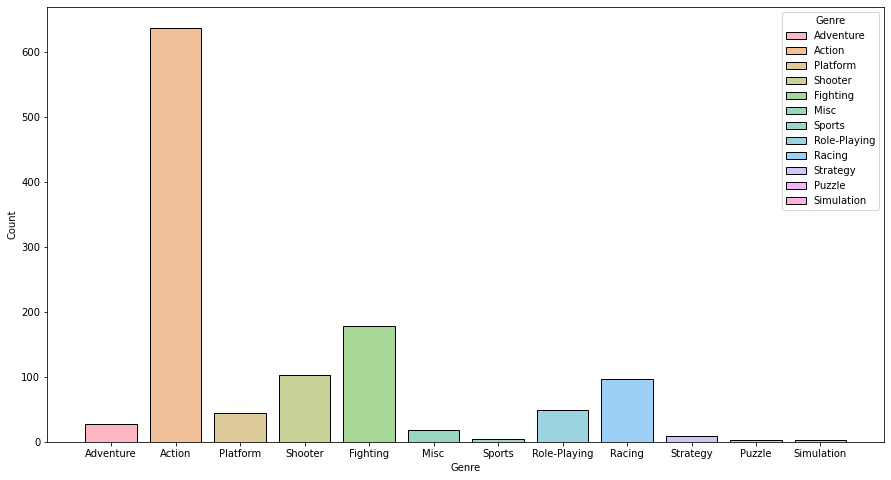

In [17]:
plt.figure(figsize= (15,8))
sns.histplot(x='Genre', data = melange_f, hue="Genre",shrink=0.8)

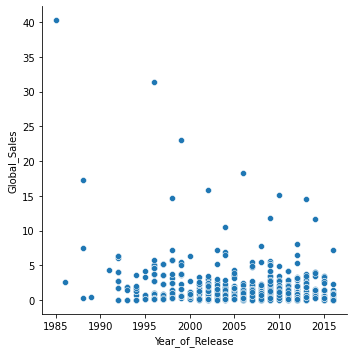

In [175]:
sns.relplot(data=melange_f, y='Global_Sales',x="Year_of_Release")

In [45]:
melange_f[melange_f['Global_Sales'] > 20]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,...,Rating,Surnom,Title,Release_date,Worldwide_box_office,Worldwide_box_office_tri,Rotten_Tomatoes,Metacritic,Distributor,Original_game_publisher
375,Pokemon Gold/Pokemon Silver,GB,1999.0,Role-Playing,Nintendo,9.00,6.18,7.20,0.71,23.10,...,NaN,Pokemon,Detective Pikachu,2019-05-10,433005346.0,433.000,68.0,53.0,Warner Bros. Pictures,NintendoThe Pokémon Company
392,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,...,NaN,Pokemon,Detective Pikachu,2019-05-10,433005346.0,433.000,68.0,53.0,Warner Bros. Pictures,NintendoThe Pokémon Company
1149,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,...,NaN,Super Mario Bros.,Super Mario Bros.,1993-05-28,38912465.0,38.912,24.0,35.0,Buena Vista Pictures Distribution,Nintendo


In [44]:
melange_f[melange_f['Global_Sales'] > 5]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,...,Rating,Surnom,Title,Release_date,Worldwide_box_office,Worldwide_box_office_tri,Rotten_Tomatoes,Metacritic,Distributor,Original_game_publisher
7,Assassin's Creed,X360,2007.0,Adventure,Ubisoft,3.28,1.64,0.07,0.56,5.54,...,M,Assassin's Creed,Assassin's Creed,2016-12-21,240558621.0,240.550,18.0,36.0,20th Century Fox,Ubisoft
14,Assassin's Creed II,PS3,2009.0,Action,Ubisoft,2.54,1.93,0.21,0.86,5.55,...,M,Assassin's Creed,Assassin's Creed,2016-12-21,240558621.0,240.550,18.0,36.0,20th Century Fox,Ubisoft
15,Assassin's Creed II,X360,2009.0,Action,Ubisoft,3.11,1.55,0.08,0.51,5.26,...,M,Assassin's Creed,Assassin's Creed,2016-12-21,240558621.0,240.550,18.0,36.0,20th Century Fox,Ubisoft
18,Assassin's Creed III,PS3,2012.0,Action,Ubisoft,2.64,2.52,0.16,1.12,6.45,...,M,Assassin's Creed,Assassin's Creed,2016-12-21,240558621.0,240.550,18.0,36.0,20th Century Fox,Ubisoft
19,Assassin's Creed III,X360,2012.0,Action,Ubisoft,3.13,1.69,0.03,0.44,5.29,...,M,Assassin's Creed,Assassin's Creed,2016-12-21,240558621.0,240.550,18.0,36.0,20th Century Fox,Ubisoft
159,Monster Hunter Freedom Unite,PSP,2008.0,Role-Playing,Capcom,0.47,0.55,4.13,0.34,5.48,...,T,Monster Hunter,Monster Hunter,2020-12-18,42145959.0,42.140,46.0,47.0,Sony Pictures Releasing,Capcom
296,Need for Speed Underground,PS2,2003.0,Racing,Electronic Arts,3.27,2.83,0.08,1.02,7.20,...,E,Need for Speed,Need for Speed,2014-03-14,203277636.0,203.270,23.0,39.0,Walt Disney Studios Motion Pictures,Electronic Arts
301,Need for Speed Underground 2,PS2,2004.0,Racing,Electronic Arts,2.71,3.02,0.08,1.09,6.90,...,E,Need for Speed,Need for Speed,2014-03-14,203277636.0,203.270,23.0,39.0,Walt Disney Studios Motion Pictures,Electronic Arts
363,Pokemon Black 2/Pokemon White 2,DS,2012.0,Role-Playing,Nintendo,2.79,1.72,3.14,0.41,8.07,...,NaN,Pokemon,Detective Pikachu,2019-05-10,433005346.0,433.000,68.0,53.0,Warner Bros. Pictures,NintendoThe Pokémon Company
364,Pokemon Black/Pokemon White,DS,2010.0,Role-Playing,Nintendo,5.51,3.17,5.65,0.80,15.14,...,NaN,Pokemon,Detective Pikachu,2019-05-10,433005346.0,433.000,68.0,53.0,Warner Bros. Pictures,NintendoThe Pokémon Company


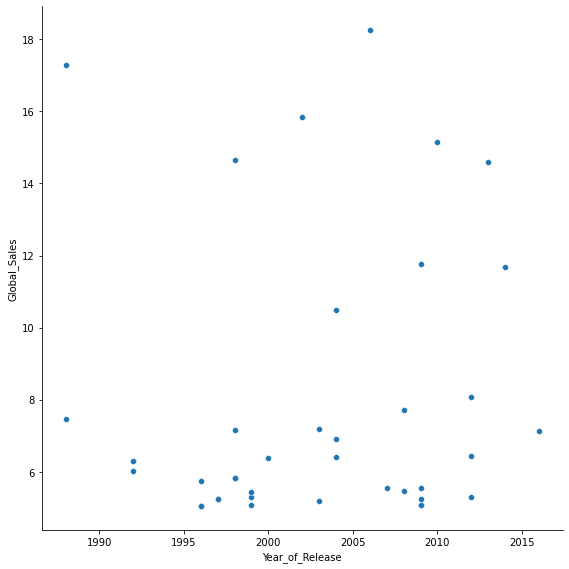

In [43]:
sns.relplot(
    x="Year_of_Release", y="Global_Sales",
    data = melange_f.query("5 < Global_Sales < 20"),
    height=8,
);

In [41]:
#sns.relplot(
#    y='Global_Sales',x="Year_of_Release",
#    data = melange_f.query("Global_Sales<10"),
#    height=8,
#);

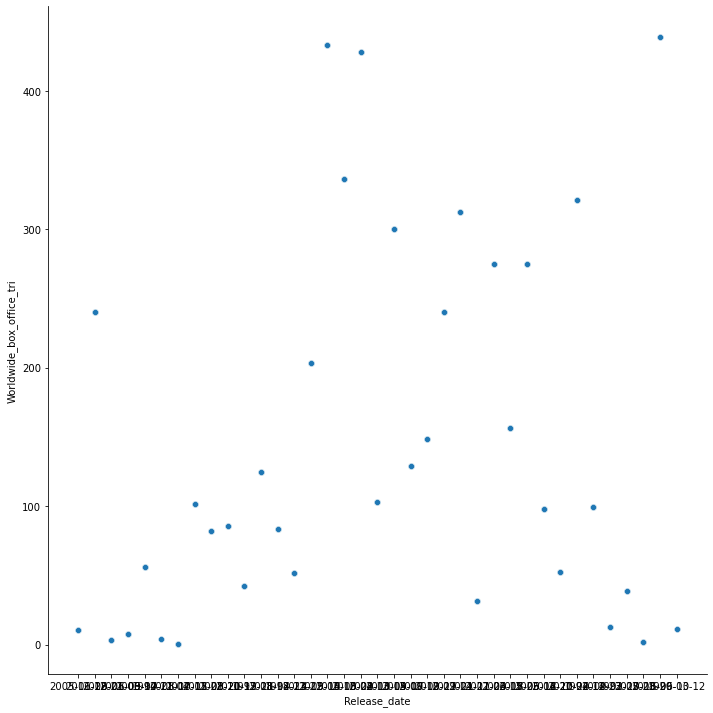

In [34]:
sns.relplot(x="Release_date", y="Worldwide_box_office_tri", data=melange_f,height=10)

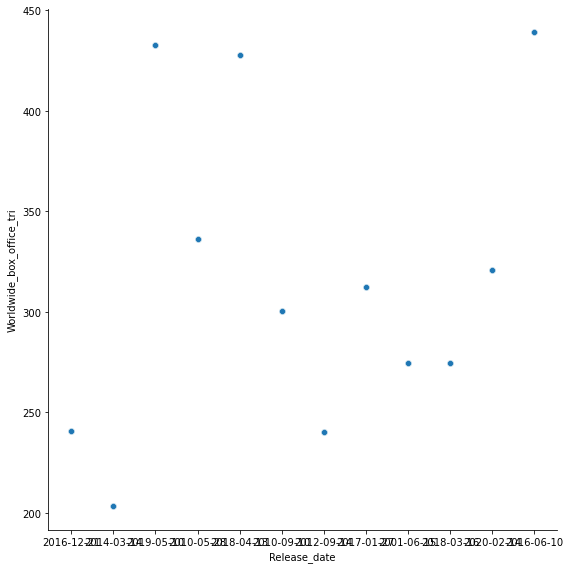

In [46]:
sns.relplot(
    y='Worldwide_box_office_tri',x='Release_date',
    data = melange_f.query("200 < Worldwide_box_office_tri < 500"),
    height=8,
);

In [67]:
#sns.relplot(data=LC, x="Year_of_Release", y="Global_Sales", height=9)

In [62]:
tri = melange_f[melange_f["Worldwide_box_office_tri"] < 400.00 ]

In [52]:
#LC = melange_f[melange_f['Surnom']=="Lara Croft"]
#LC = LC.reset_index(drop=True)
#LC

In [53]:
#sns.relplot(data=LC, x="Year_of_Release", y="Global_Sales", hue="Global_Sales",height=9)

<AxesSubplot:xlabel='Surnom', ylabel='Worldwide_box_office_tri'>

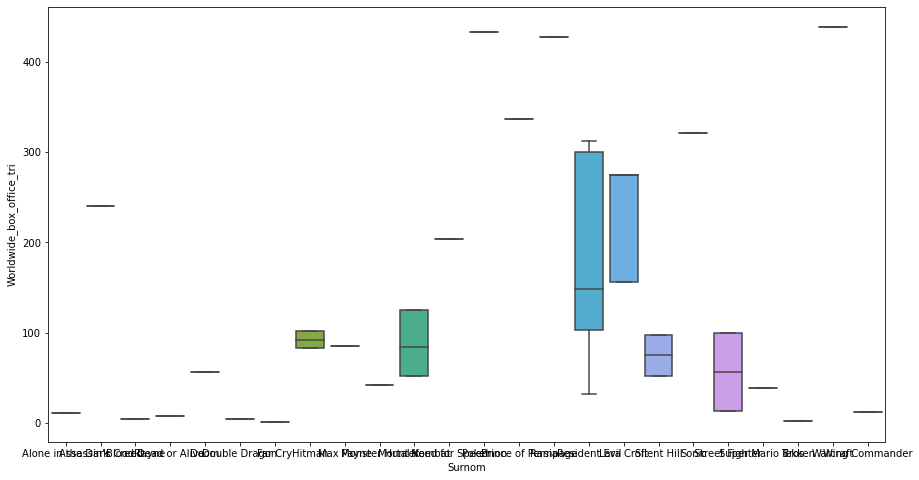

In [68]:
plt.figure(figsize= (15,8))
sns.boxplot(data=melange_f, x="Surnom", y="Worldwide_box_office_tri")